## Pandas

Pandas是Wes McKinney在2008年开发的一个强大的分析结构化数据的工具集。Pandas以NumPy为基础（数据表示和运算），提供了用于数据处理的函数和方法，对数据分析和数据挖掘提供了很好的支持；同时Pandas还可以跟数据可视化工具Matplotlib很好的整合在一起，非常轻松愉快的实现数据的可视化展示。

Pandas核心的数据类型是Series（数据系列）、DataFrame（数据表/数据框），分别用于处理一维和二维的数据，除此之外还有一个名为Index的类型及其子类型，它为Series和DataFrame提供了索引功能。日常工作中以DataFrame使用最为广泛，因为二维的数据本质就是一个有行有列的表格（想一想Excel电子表格和关系型数据库中的二维表）。上述这些类型都提供了大量的处理数据的方法，数据分析师可以以此为基础实现对数据的各种常规处理。

### Series

Pandas库中的Series对象可以用来表示一维数据结构，跟数组非常类似，但是多了一些额外的功能。Series的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引。

#### 创建Series对象

In [1]:
# 导入依赖
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 通过列表创建
# data参数表示数据，index参数表示数据的索引（标签）
# 如果没有指定index属性，默认使用数字索引
ser1 = pd.Series(data=[320, 180, 300, 405], index=['一季度', '二季度', '三季度', '四季度'])
ser1

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

In [3]:
# 通过字典创建
# 字典中的键就是数据的索引（标签），字典中的值就是数据
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

#### 索引和切片

跟列表一样，Series对象也可以进行索引和切片操作，不同的是Series对象因为内部维护了一个保存索引的数组，所以除了可以使用默认索引（从0开始）检索数据外，还可以通过自己设置的索引标签获取对应的数据。

In [4]:
# 使用默认索引检索数据
print(ser2[0], ser2[1], ser2[-1])

# 修改数据
ser2[0], ser2[3] = 350, 360
ser2

320 180 405


一季度    350
二季度    180
三季度    300
四季度    360
dtype: int64

In [5]:
# 使用自定义的标签索引
print(ser2['一季度'], ser2['三季度'])
ser2['一季度'] = 380
ser2

350 300


一季度    380
二季度    180
三季度    300
四季度    360
dtype: int64

#### 切片操作

In [6]:
ser2[1:3]

二季度    180
三季度    300
dtype: int64

In [7]:
ser2['二季度':'四季度']

二季度    180
三季度    300
四季度    360
dtype: int64

In [8]:
ser2[1:3] = 400, 500
ser2

一季度    380
二季度    400
三季度    500
四季度    360
dtype: int64

#### 花式索引

In [9]:
ser2[["二季度", "四季度"]]

二季度    400
四季度    360
dtype: int64

In [10]:
ser2[["二季度", "四季度"]] = 500, 520
ser2

一季度    380
二季度    500
三季度    500
四季度    520
dtype: int64

#### 布尔索引

In [11]:
ser2[ser2 >= 500]

二季度    500
三季度    500
四季度    520
dtype: int64

#### 属性和方法

Series对象的常用属性如下表所示。



| 属性                      | 说明                                    |
| ------------------------- | --------------------------------------- |
| `dtype` / `dtypes`        | 返回`Series`对象的数据类型              |
| `hasnans`                 | 判断`Series`对象中有没有空值            |
| `at` / `iat`              | 通过索引访问`Series`对象中的单个值      |
| `loc` / `iloc`            | 通过一组索引访问`Series`对象中的一组值  |
| `index`                   | 返回`Series`对象的索引                  |
| `is_monotonic`            | 判断`Series`对象中的数据是否单调        |
| `is_monotonic_increasing` | 判断`Series`对象中的数据是否单调递增    |
| `is_monotonic_decreasing` | 判断`Series`对象中的数据是否单调递减    |
| `is_unique`               | 判断`Series`对象中的数据是否独一无二    |
| `size`                    | 返回`Series`对象中元素的个数            |
| `values`                  | 以`ndarray`的方式返回`Series`对象中的值 |

Series对象的方法很多，我们通过下面的代码为大家介绍一些常用的方法。

#### 统计相关的方法

In [12]:
# Series对象支持各种获取描述性统计信息的方法。

# 求和
print(ser2.sum())
# 求均值
print(ser2.mean())
# 求最大
print(ser2.max())
# 求最小
print(ser2.min())
# 计数
print(ser2.count())
# 求标准差
print(ser2.std())
# 求方差
print(ser2.var())
# 求中位数
print(ser2.median())

1900
475.0
520
380
4
64.03124237432849
4100.0
500.0


In [13]:
# Series对象还有一个名为describe()的方法，可以获得上述所有的描述性统计信息
ser2.describe()

count      4.000000
mean     475.000000
std       64.031242
min      380.000000
25%      470.000000
50%      500.000000
75%      505.000000
max      520.000000
dtype: float64

提示：因为describe()返回的也是一个Series对象，所以也可以用ser2.describe()['mean']来获取平均值。

如果Series对象有重复的值，我们可以使用unique()方法获得去重之后的Series对象；可以使用nunique()方法统计不重复值的数量；如果想要统计每个值重复的次数，可以使用value_counts()方法，这个方法会返回一个Series对象，它的索引就是原来的Series对象中的值，而每个值出现的次数就是返回的Series对象中的数据，在默认情况下会按照出现次数做降序排列。

In [14]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
dtype: int64

In [15]:
ser3.nunique()

4

#### 数据处理的方法

Series对象的isnull()和notnull()方法可以用于空值的判断

In [16]:
ser4 = pd.Series(data=[10, 20, np.NaN, 30, np.NaN])
ser4.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [17]:
ser4.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

Series对象的dropna()和fillna()方法分别用来删除空值和填充空值

In [18]:
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [19]:
# 将空值填充为40
ser4.fillna(value=40)

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

需要提醒大家注意的是，dropna()和fillna()方法都有一个名为inplace的参数，它的默认值是False，表示删除空值或填充空值不会修改原来的Series对象，而是返回一个新的Series对象来表示删除或填充空值后的数据系列，如果将inplace参数的值修改为True，那么删除或填充空值会就地操作，直接修改原来的Series对象，那么方法的返回值是None。后面我们会接触到的很多方法，包括DataFrame对象的很多方法都会有这个参数，它们的意义跟这里是一样的。

In [20]:
# backfill或bfill表示用后一个元素的值填充空值
# ffill或pad表示用前一个元素的值填充空值
ser4.fillna(method='bfill')

0    10.0
1    20.0
2    30.0
3    30.0
4     NaN
dtype: float64

In [21]:
ser4.fillna(method='ffill')

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

Series对象的mask()和where()方法可以将满足或不满足条件的值进行替换，如下所示。

In [22]:
ser5 = pd.Series(range(5))
ser5.where(ser5>0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [23]:
ser5.where(ser5>0, 10)

0    10
1     1
2     2
3     3
4     4
dtype: int64

In [24]:
ser5.mask(ser5>0, 10)

0     0
1    10
2    10
3    10
4    10
dtype: int64

Series对象的duplicated()方法可以帮助我们找出重复的数据，而drop_duplicates()方法可以帮我们删除重复数据。

In [25]:
ser3

0     apple
1    banana
2     apple
3    pitaya
4     apple
5    pitaya
6    durian
dtype: object

In [26]:
ser3.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [27]:
ser3.drop_duplicates()

0     apple
1    banana
3    pitaya
6    durian
dtype: object

Series对象的map()和apply()方法非常重要，它们可以用于数据处理，把数据映射或转换成我们期望的样子，这个操作在数据分析的数据准备阶段非常重要。

In [28]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [29]:
ser6.map({'cat': "kitten", "dog": "puppy"})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [30]:
ser6.map("I am a {}".format, na_action="ignore")

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [31]:
ser7 = pd.Series([20, 21, 12], index=["London", "New York", "Helsinki"])
ser7

London      20
New York    21
Helsinki    12
dtype: int64

In [32]:
ser7.apply(np.square)

London      400
New York    441
Helsinki    144
dtype: int64

In [33]:
ser7.apply(lambda x, value: x - value, args=(5, ))

London      15
New York    16
Helsinki     7
dtype: int64

排序和取头部值的方法

Series对象的sort_index()和sort_values()方法可以用于对索引和数据的排序，排序方法有一个名为ascending的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为kind的参数则用来控制排序使用的算法，默认使用了quicksort，也可以选择mergesort或heapsort；如果存在空值，那么可以用na_position参数空值放在最前还是最后，默认是last，代码如下所示：

In [34]:
ser8 = pd.Series(data=[35, 96, 12, 57, 25, 89], index=["grape", "banana", "pitaya", "apple", "peach", "orange"])
ser8

grape     35
banana    96
pitaya    12
apple     57
peach     25
orange    89
dtype: int64

In [35]:
# 按值升序排列
ser8.sort_values()
# ser8.sort_values(ascending=False)  # 倒序排列

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [36]:
# 按索引倒序排列
ser8.sort_index(ascending=False)

pitaya    12
peach     25
orange    89
grape     35
banana    96
apple     57
dtype: int64

如果要从Series对象中找出元素中最大或最小的“Top-N”，实际上是不需要对所有的值进行排序的，可以使用nlargest()和nsmallest()方法来完成，如下所示：

In [37]:
# 值最大的3个
ser8.nlargest(3)

banana    96
orange    89
apple     57
dtype: int64

In [38]:
# 值最小的2个
ser8.nsmallest(2)

pitaya    12
peach     25
dtype: int64

#### 绘制图表

Series对象有一个名为plot的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，使用Series对象的数据作为纵坐标。

首先导入matplotlib中pyplot模块并进行必要的配置。

In [39]:
import matplotlib.pyplot as plt
# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

创建Series对象并绘制对应的柱状图。

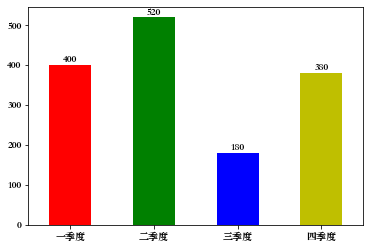

In [40]:
ser9 = pd.Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
# 通过Series对象的 plot 方法绘图（kind=‘bar'表示绘制柱状图）
ser9.plot(kind='bar', color=["r", "g", "b", "y"])

# 支持中文(放在开头声明却不生效？)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# x轴的坐标旋转到0度（中文水平显示）
plt.xticks(rotation=0)
# 在柱状图的柱子上绘制数字
for i in range(4):
    plt.text(i, ser9[i] + 5, ser9[i], ha='center')
# 显示图像
plt.show()

绘制反映每个季度占比的饼图。

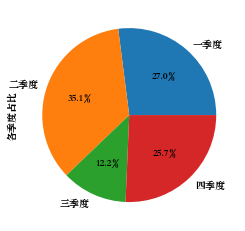

In [43]:
# autopct参数可以配置在饼图上显示每块饼的占比
ser9.plot(kind="pie", autopct='%.1f%%')
# 设置 y 轴的标签
plt.ylabel("各季度占比")
plt.show()

### DataFrame

#### 创建dataframe对象：

In [44]:
# 通过二维数组创建DataFrame对象
scores = np.random.randint(60, 101, (5, 3))
courses = ["语文"]